##General Code

In [198]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysentani

In [199]:
survey = pd.read_excel('../data-clean/sentani-merged-cleaned-2015-06-10.xlsx',na_values=[''])
print('number of entries =', len(survey))
print('number of columns =', len(survey.columns))

number of entries = 1184
number of columns = 274


In [200]:
pysentani.similar_columns(survey,'demand')

demand_point
demand_point_other


In [201]:
survey['electricity_expenditure_monthly'] = pysentani.elec_expenditure_monthly(survey)
survey['electricity_expenditure_monthly_log'] = survey['electricity_expenditure_monthly'].dropna().replace(0, 1)
survey['electricity_expenditure_monthly_log'] = np.log10(survey['electricity_expenditure_monthly_log'])
survey['income_monthly'] = pysentani.income_monthly(survey)
survey['access_type'] = pysentani.access_type(survey)
survey['income_monthly'] = survey['income_monthly'].replace(0, 1)
survey['income_monthly_log'] = np.log10(survey['income_monthly'])

##Create New Data Frame to Hold Percent Ownership Data

In [202]:
household_survey = survey[survey['demand_point'] == 'household']
hh_series = pd.value_counts(household_survey['village_name'])

app_series = ['app_now/rice_cooker','app_now/TV','app_now/fridge','app_now/fan','app_now/lighting','app_now/radio']

pao_ls = []

for aps in app_series:

    at_series = ['PLN_grid','PLN_microgrid','community_microgrid','no_access'] 
    temp_app_df = pd.crosstab(household_survey['access_type'],household_survey[aps])
    
    for ats in at_series:
        percent_ownership = (temp_app_df[1.0][ats]/(temp_app_df[1.0][ats] + temp_app_df[0.0][ats])) * 100
        pao_ls.append({'access_type':ats,'appliance':aps,'percent_ownership':percent_ownership})


pao_df = pd.DataFrame(pao_ls)

###Split Appliance Column Names into Suitable Axis Labels for Plot

In [203]:
app_name_ls = []

for i in app_series:
    app_name_ls.append(i.split('/', 1 )[1])
    
app_name_ls

['rice_cooker', 'TV', 'fridge', 'fan', 'lighting', 'radio']

##Format and Display Plot of Percent Appliance Ownership by Access Type

[<matplotlib.text.Text at 0x1189d2400>, <matplotlib.text.Text at 0x10c31bb38>]

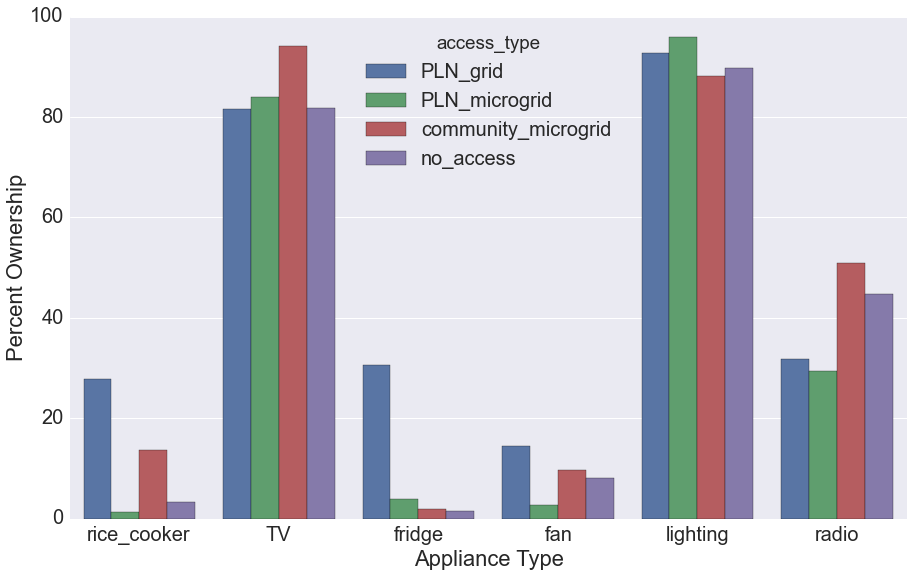

In [204]:
sns.set(font_scale = 2)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

ax = sns.barplot(x="appliance", y="percent_ownership", hue="access_type", data=pao_df)

ax.set_xticklabels(app_name_ls)
ax.set(xlabel='Appliance Type', ylabel='Percent Ownership')